In [38]:
#Load libraries
import os
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns
from random import randrange, uniform


In [39]:
mydta= pd.read_csv("C:\\Users\\SINGRAI SUREN\\Downloads\\bank-loan.csv")


In [40]:
#Create dataframe with missing percentage
missing_val = pd.DataFrame(mydta.isnull().sum())

#Reset index
missing_val = missing_val.reset_index()

#Rename variable
missing_val = missing_val.rename(columns = {'index': 'Variables', 0: 'Missing_percentage'})

#Calculate percentage
missing_val['Missing_percentage'] = (missing_val['Missing_percentage']/len(mydta))*100

#descending order
missing_val = missing_val.sort_values('Missing_percentage', ascending = False).reset_index(drop = True)



In [41]:
mydta['default'] = mydta['default'].fillna(mydta['default'].median())


In [4]:
mydta.head(20)

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0
5,41,2,5,5,25,10.2,0.392700,2.157300,0.0
6,39,1,20,9,67,30.6,3.833874,16.668126,0.0
7,43,1,12,11,38,3.6,0.128592,1.239408,0.0
8,24,1,3,4,19,24.4,1.358348,3.277652,1.0
9,36,1,0,13,25,19.7,2.777700,2.147300,0.0


In [42]:
#Assigning levels to the categories
lis = []
for i in range(0, mydta.shape[1]):
    print(i)
    if(mydta.iloc[:,i].dtypes == 'object'):
        mydta.iloc[:,i] = pd.Categorical(mydta.iloc[:,i])
        print(marketing_train[[i]])
        mydta.iloc[:,i] = mydta.iloc[:,i].cat.codes 
        mydta.iloc[:,i] = mydta.iloc[:,i].astype('object')
        
        lis.append(mydta.columns[i])

0
1
2
3
4
5
6
7
8


In [43]:
#Convert into proper datatypes
for i in lis:
    mydta.loc[:,i] = mydta.loc[:,i].round()
    mydta.loc[:,i] = mydta.loc[:,i].astype('object')

In [44]:
cnames = ["age","ed","employ","address","income","debtinc","creddebt","othdebt"]

In [20]:
#Detect and delete outliers from data
for i in cnames:
     print(i)
     q75, q25 = np.percentile(mydta.loc[:,i], [75 ,25])
     iqr = q75 - q25

     min = q25 - (iqr*1.5)
     max = q75 + (iqr*1.5)
     print(min)
     print(max)
    
     mydta = mydta.drop(mydta[mydta.loc[:,i] < min].index)
     mydta = mydta.drop(mydta[mydta.loc[:,i] > max].index)

age
13.0
53.0
ed
-0.5
3.5
employ
-5.625
19.375
address
-10.0
22.0
income
-2.875
64.125
debtinc
-3.749999999999999
17.45
creddebt
-0.7273812499999999
1.8006087499999999
othdebt
-1.0821980000000004
3.8713220000000006


In [45]:
mydta.head(20)

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0
5,41,2,5,5,25,10.2,0.392700,2.157300,0.0
6,39,1,20,9,67,30.6,3.833874,16.668126,0.0
7,43,1,12,11,38,3.6,0.128592,1.239408,0.0
8,24,1,3,4,19,24.4,1.358348,3.277652,1.0
9,36,1,0,13,25,19.7,2.777700,2.147300,0.0


In [46]:
#Import Libraries for decision tree
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0
5,41,2,5,5,25,10.2,0.392700,2.157300,0.0
6,39,1,20,9,67,30.6,3.833874,16.668126,0.0
7,43,1,12,11,38,3.6,0.128592,1.239408,0.0
8,24,1,3,4,19,24.4,1.358348,3.277652,1.0
9,36,1,0,13,25,19.7,2.777700,2.147300,0.0


In [48]:
#Divide data into train and test
X = mydta.values[:, 0:8]
Y = mydta.values[:,8]

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.2)

In [50]:
#Decision Tree
C50_model = tree.DecisionTreeClassifier(criterion='entropy').fit(X_train, y_train)

#predict new test cases
C50_Predictions = C50_model.predict(X_test)

In [51]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy').fit(X_train,y_train)

In [52]:
y_pred = clf.predict(X_test)

In [72]:
#build confusion matrix
from sklearn.metrics import confusion_matrix 
CM = confusion_matrix(y_test, y_pred)
CM = pd.crosstab(y_test, C50_Predictions)

#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

#check accuracy of model
#accuracy_score(y_test, y_pred)*100
((TP+TN)*100)/(TP+TN+FP+FN)

#False Negative rate 
(FN*100)/(FN+TP)

68.57142857142857

No Skill: ROC AUC=0.500
Decision Tree: ROC AUC=0.623


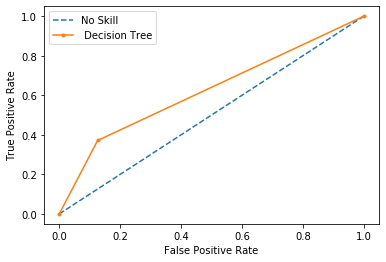

In [84]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# predict probabilities
# generate a no skill prediction (majority class)
ns_probs = [0 for i in range(len(y_test))]
lr_probs = clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Decision Tree: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label=' Decision Tree')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [54]:
#Let us prepare data for logistic regression
#replace target categories with Yes or No
mydta['default'] = mydta['default'].replace('No', 0)
mydta['default'] = mydta['default'].replace('Yes', 1)

In [56]:
#Create logistic data. Save target variable first
mydta_logit = pd.DataFrame(mydta['default'])

In [57]:
#Add continous variables
mydta_logit = mydta_logit.join(mydta[cnames])

In [58]:
mydta_logit.head()

,default,age,ed,employ,address,income,debtinc,creddebt,othdebt
0,1.0,41,3,17,12,176,9.3,11.359392,5.008608
1,0.0,27,1,10,6,31,17.3,1.362202,4.000798
2,0.0,40,1,15,14,55,5.5,0.856075,2.168925
3,0.0,41,1,15,14,120,2.9,2.658720,0.821280
4,1.0,24,2,2,0,28,17.3,1.787436,3.056564


In [61]:
##Create dummies for categorical variables
cat_names = ["ed"]

for i in cat_names:
    temp = pd.get_dummies(mydta[i], prefix = i)
    mydta_logit = mydta_logit.join(temp)

In [62]:
Sample_Index = np.random.rand(len(mydta_logit)) < 0.8

train = mydta_logit[Sample_Index]
test = mydta_logit[~Sample_Index]

In [63]:
#select column indexes for independent variables
train_cols = train.columns[1:30]

In [65]:
#Built Logistic Regression
import statsmodels.api as sm

logit = sm.Logit(train['default'], train[train_cols]).fit()

logit.summary()

Optimization terminated successfully.
         Current function value: 0.377727
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                  660
Model:                          Logit   Df Residuals:                      648
Method:                           MLE   Df Model:                           11
Date:                Sat, 08 Feb 2020   Pseudo R-squ.:                  0.2773
Time:                        20:03:45   Log-Likelihood:                -249.30
converged:                       True   LL-Null:                       -344.95
Covariance Type:            nonrobust   LLR p-value:                 4.711e-35
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.0063      0.019      0.324      0.746      -0.032       0.044
ed            -0.4090        nan        nan        nan         nan         nan
employ        -0.2078      0.032     -6.462      0.000      -0.271      -0.145
address       -0.0486      0.023     -2.086      0.037      -0.094      -0.003
income         0.0023      0.006      0.364      0.716      -0.010       0.014
debtinc        0.1116      0.027      4.110      0.000       0.058       0.165
creddebt       0.3756      0.090      4.196      0.000       0.200       0.551
othdebt       -0.0351      0.058     -0.601      0.548      -0.150       0.079
ed_1          -1.4246        nan        nan        nan         nan         nan
ed_2          -0.6006        nan        nan        nan         nan         nan
ed_3          -0.1111        nan        nan        nan         nan         nan
ed_4          -0.8634        nan        nan        nan         nan         nan
ed_5           1.2007        nan        nan        nan         nan         nan
==============================================================================
"""

In [66]:
#Predict test data
test['Actual_prob'] = logit.predict(test[train_cols])

test['ActualVal'] = 1
test.loc[test.Actual_prob < 0.5, 'ActualVal'] = 0

G:\songs videos\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
G:\songs videos\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
G:\songs videos\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.p

In [68]:
#Build confusion matrix
CM = pd.crosstab(test['default'], test['ActualVal'])

#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

#check accuracy of model
#accuracy_score(y_test, y_pred)*100
((TP+TN)*100)/(TP+TN+FP+FN)

#(FN*100)/(FN+TP)

80.0

G:\songs videos\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


No Skill: ROC AUC=0.500
Logistic Regression: ROC AUC=0.812


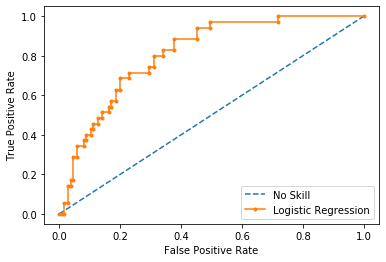

In [87]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot
# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)
# predict probabilities
lr_probs = model.predict_proba(X_test)
# generate a no skill prediction (majority class)
ns_probs = [0 for i in range(len(y_test))]
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic Regression: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic Regression')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()


In [74]:
from sklearn.metrics import auc
from matplotlib import pyplot


In [69]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier(n_estimators = 20).fit(X_train, y_train)

In [70]:
RF_Predictions = RF_model.predict(X_test)

In [71]:
#build confusion matrix
# from sklearn.metrics import confusion_matrix 
# CM = confusion_matrix(y_test, y_pred)
CM = pd.crosstab(y_test, RF_Predictions)

#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

#check accuracy of model
#accuracy_score(y_test, y_pred)*100
((TP+TN)*100)/(TP+TN+FP+FN)

#False Negative rate 
#(FN*100)/(FN+TP)

81.17647058823529

No Skill: ROC AUC=0.500
Random Forest: ROC AUC=0.782


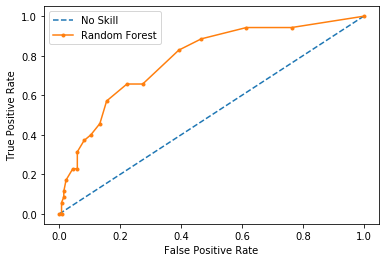

In [80]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# predict probabilities
# generate a no skill prediction (majority class)
ns_probs = [0 for i in range(len(y_test))]
lr_probs = RF_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('logistic regression: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='logistic regression')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()